Importing the libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv('data.csv')

Dropping the column Indicator because it is duplicate column

In [46]:
df_cleaned = df.drop(columns=["Indicator"])

We are dropping rows containg CTS_Name=CO2 Emissions Multipliers and CO2 Emissions Intensities

In [47]:
df_cleaned = df_cleaned[df_cleaned["CTS_Name"] != 'CO2 Emissions Multipliers']
df_cleaned = df_cleaned[df_cleaned["CTS_Name"] != 'CO2 Emissions Intensities']

Checking for null values

In [48]:
df_cleaned.isnull()

,ObjectId,Country,ISO2,ISO3,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Industry,...,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8890,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8901,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8903,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8907,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Creating heatmap for null values where yellow color is showing null values

<Axes: >

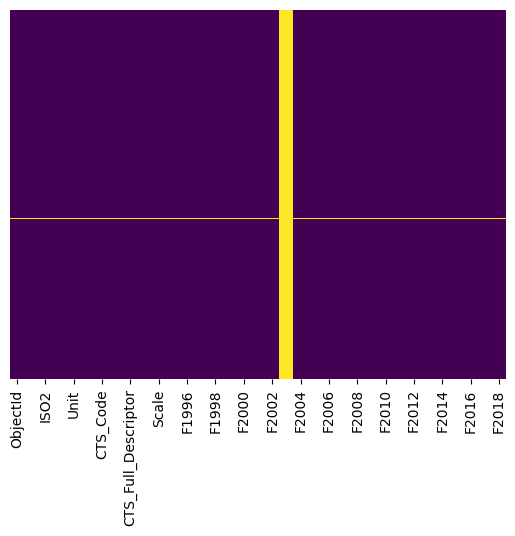

In [49]:
sns.heatmap(df_cleaned.isnull(),yticklabels = False,cbar =False,cmap = 'viridis')

Dropping 2003 column because it has only null values

In [50]:
df_cleaned.drop('F2003',axis=1,inplace = True)

Now checking for null values from graph again

<Axes: >

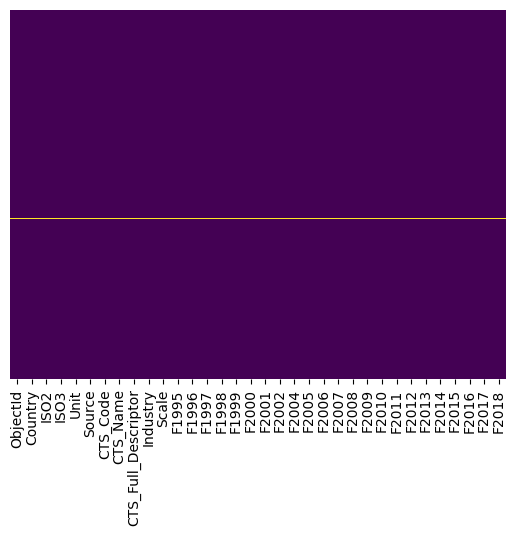

In [51]:
sns.heatmap(df_cleaned.isnull(),yticklabels = False,cbar =False,cmap = 'viridis')

Now we will fill remaining null values with zero

In [52]:
columns_to_fill = ['F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 
                   'F2001', 'F2002', 'F2004', 'F2005', 'F2006', 'F2007', 
                   'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 
                   'F2014', 'F2015', 'F2016', 'F2017', 'F2018']

df_cleaned[columns_to_fill] = df_cleaned[columns_to_fill].fillna(0)
df_cleaned = df_cleaned.dropna(subset=['Scale'])

Now heatmap after removing or filling all null values

<Axes: >

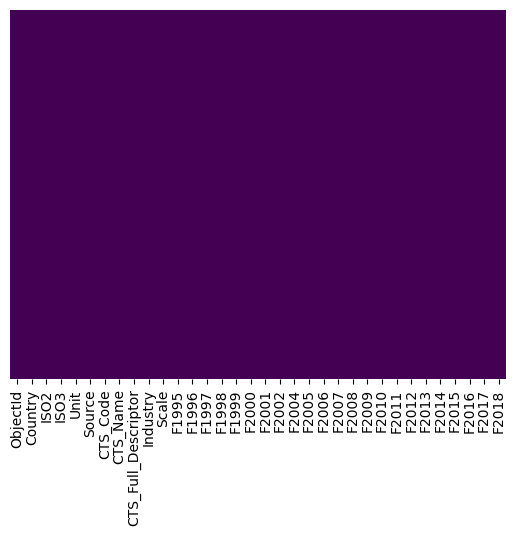

In [53]:
sns.heatmap(df_cleaned.isnull(),yticklabels = False,cbar =False,cmap = 'viridis')

Filling all negative values with zero because co2 emission can't be negative

In [54]:
columns_to_fix = ['F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 
                  'F2001', 'F2002', 'F2004', 'F2005', 'F2006', 'F2007', 
                  'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 
                  'F2014', 'F2015', 'F2016', 'F2017', 'F2018']

for col in columns_to_fix:
    df_cleaned[col] = df_cleaned[col].apply(lambda x: 0 if x < 0 else x)    

### Removing outlier


In [55]:
from scipy import stats
import numpy as np
import pandas as pd

# Assuming 'data' is your DataFrame and 'columns_to_fix' are specific columns in your dataset
columns_to_fix = ['F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 
                  'F2001', 'F2002', 'F2004', 'F2005', 'F2006', 'F2007', 
                  'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 
                  'F2014', 'F2015', 'F2016', 'F2017', 'F2018']

# Apply Z-score calculation only on the specified columns
z_scores = np.abs(stats.zscore(df_cleaned[columns_to_fix]))

# Set the Z-score threshold for outlier removal (3 is a common choice)
threshold = 3

# Filter out rows where any column in 'columns_to_fix' has a Z-score greater than the threshold
df_cleaned= df_cleaned[(z_scores < threshold).all(axis=1)]


      ObjectId              Country ISO2 ISO3                            Unit  \
7          2.0            Argentina   AR  ARG  Millions of Metric tons of CO2   
10      8388.0               Turkey   TR  TUR  Millions of Metric tons of CO2   
14      5401.0              Morocco   MA  MAR  Millions of Metric tons of CO2   
15       173.0            Australia   AU  AUS  Millions of Metric tons of CO2   
22      2863.0              Germany   DE  DEU  Millions of Metric tons of CO2   
...        ...                  ...  ...  ...                             ...   
8890    2876.0              Germany   DE  DEU  Millions of Metric tons of CO2   
8901    8813.0              Vietnam   VN  VNM  Millions of Metric tons of CO2   
8903    4212.0  Kazakhstan, Rep. of   KZ  KAZ  Millions of Metric tons of CO2   
8907    2182.0           Czech Rep.   CZ  CZE  Millions of Metric tons of CO2   
8908    2034.0               Cyprus   CY  CYP  Millions of Metric tons of CO2   

                           

Now we are going to plot our data for proper visualization

Below code for plotting name of countries according to their CO2 emission

                   Country  Total_F2012
30   China, P.R.: Mainland     1741.881
61           United States     1078.702
52                   Japan      604.912
7           Korea, Rep. of      573.783
50      Russian Federation      521.981
..                     ...          ...
26              Costa Rica        4.756
55                   Malta        3.569
13                Cambodia        3.507
49                 Iceland        2.675
28  Lao People's Dem. Rep.        2.608

[66 rows x 2 columns]


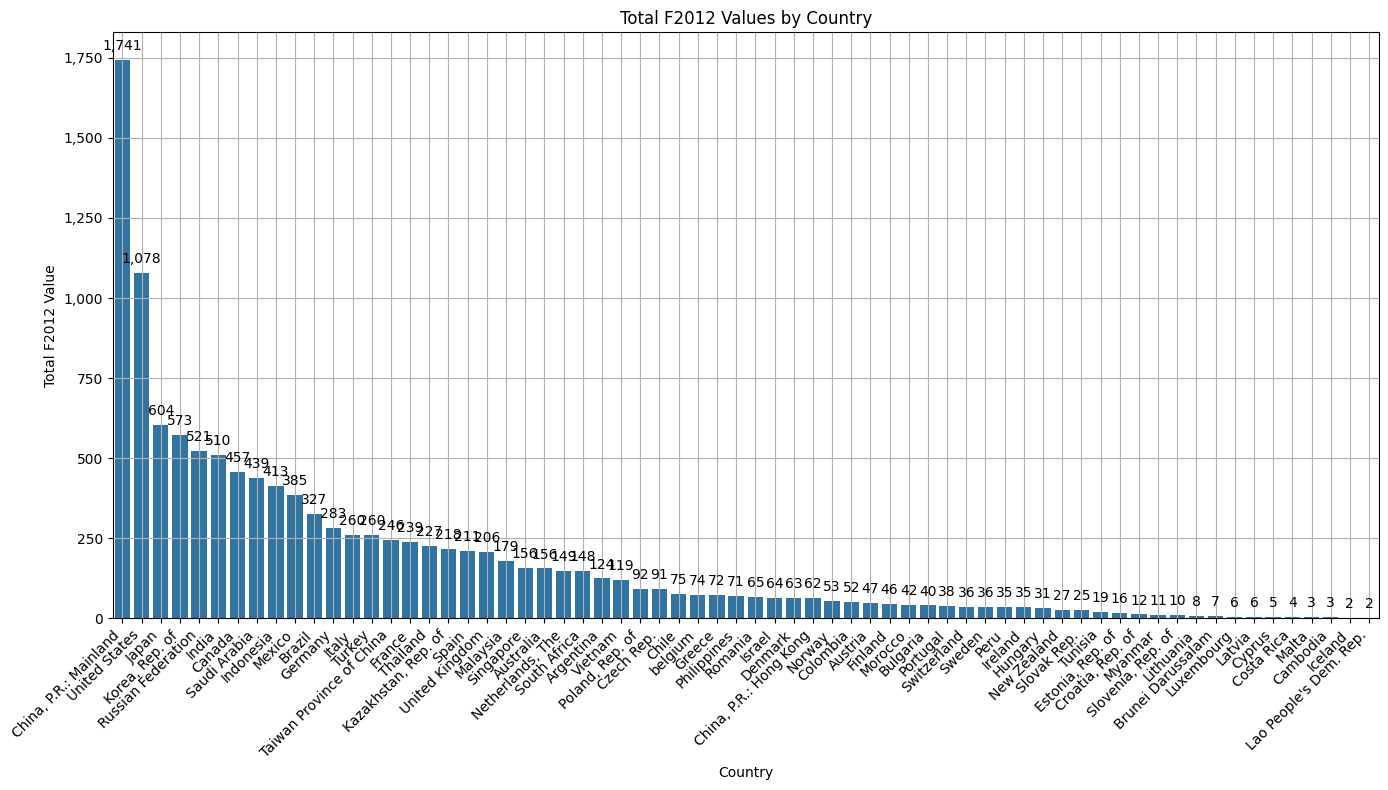

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter


unique_countries = df_cleaned['Country'].unique()

summed_values = []


for country in unique_countries:
    
    filtered_df = df_cleaned[df_cleaned['Country'] == country]
    year2012 = filtered_df['F2012'].sum()
    
    
    summed_values.append({'Country': country, 'Total_F2012': year2012})


summed_values_df = pd.DataFrame(summed_values)
summed_values_df = summed_values_df.sort_values(by='Total_F2012', ascending=False)

print(summed_values_df)


plt.figure(figsize=(14, 8))  
bar_plot = sns.barplot(x='Country', y='Total_F2012', data=summed_values_df)
plt.title('Total F2012 Values by Country')
plt.xlabel('Country')
plt.ylabel('Total F2012 Value')


plt.xticks(rotation=45, ha='right')
plt.grid()


def format_y_values(value, tick_number):
    return f'{int(value):,}'  

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))


for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout()  
plt.show() 

Now same plotting but for only top 10 countries

                  Country  Total_F2012
30  China, P.R.: Mainland     1741.881
61          United States     1078.702
52                  Japan      604.912
7          Korea, Rep. of      573.783
50     Russian Federation      521.981
27                  India      510.163
64                 Canada      457.489
51           Saudi Arabia      439.255
62              Indonesia      413.958
33                 Mexico      385.803


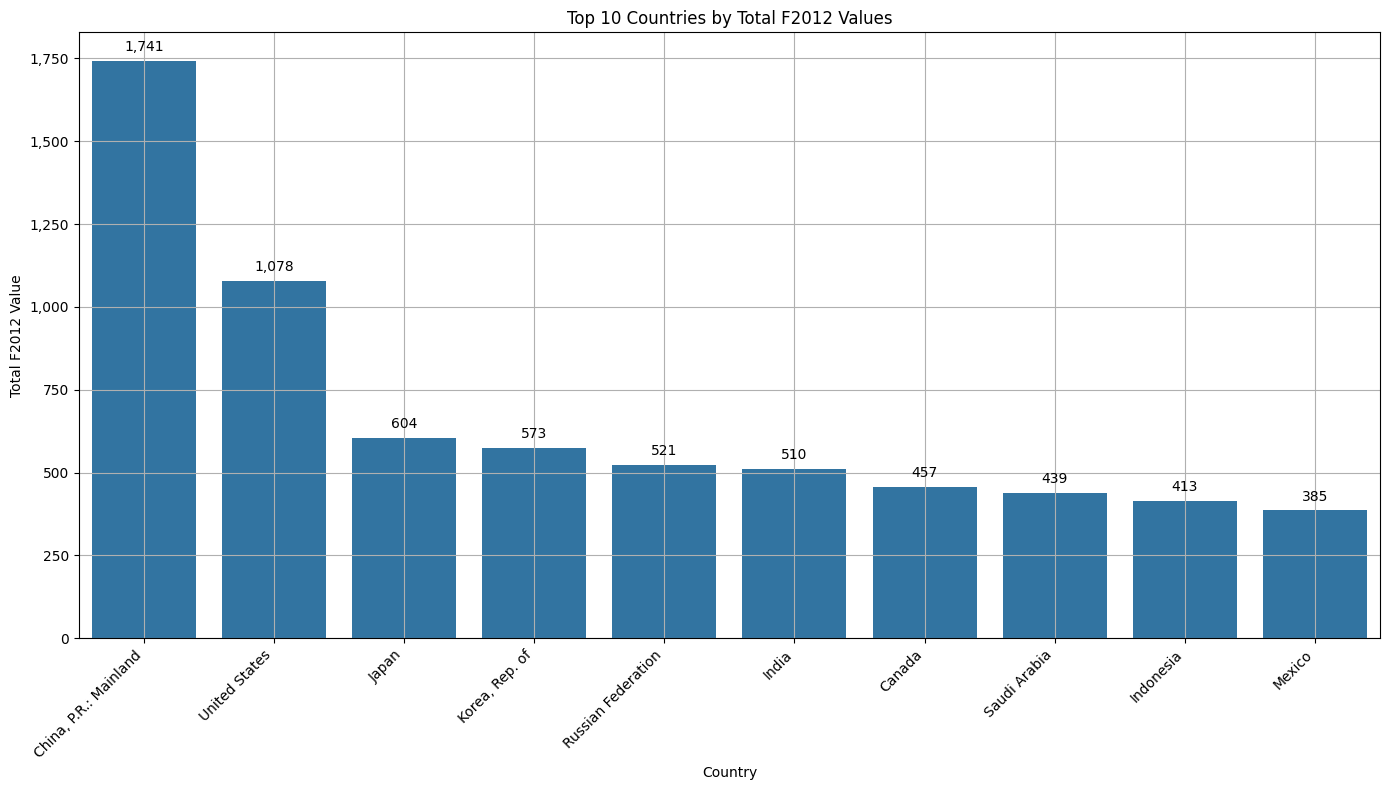

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter


unique_countries = df_cleaned['Country'].unique()

summed_values = []


for country in unique_countries:
    filtered_df = df_cleaned[df_cleaned['Country'] == country]
    year2012 = filtered_df['F2012'].sum()
    
    
    summed_values.append({'Country': country, 'Total_F2012': year2012})


summed_values_df = pd.DataFrame(summed_values)
summed_values_df = summed_values_df.sort_values(by='Total_F2012', ascending=False)


top_10_countries_df = summed_values_df.head(10)
print(top_10_countries_df)


plt.figure(figsize=(14, 8)) 
bar_plot = sns.barplot(x='Country', y='Total_F2012', data=top_10_countries_df)
plt.title('Top 10 Countries by Total F2012 Values')
plt.xlabel('Country')
plt.ylabel('Total F2012 Value')


plt.xticks(rotation=45, ha='right')
plt.grid()


def format_y_values(value, tick_number):
    return f'{int(value):,}'  


plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))


for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout()  
plt.show()


                  Country  Total_F2012  Total_F2013
30  China, P.R.: Mainland     1741.881     1761.082
61          United States     1078.702     1126.333
52                  Japan      604.912      611.157
7          Korea, Rep. of      573.783      575.238
50     Russian Federation      521.981      506.193
27                  India      510.163      560.577
64                 Canada      457.489      464.501
51           Saudi Arabia      439.255      435.219
62              Indonesia      413.958      373.863
33                 Mexico      385.803      365.618


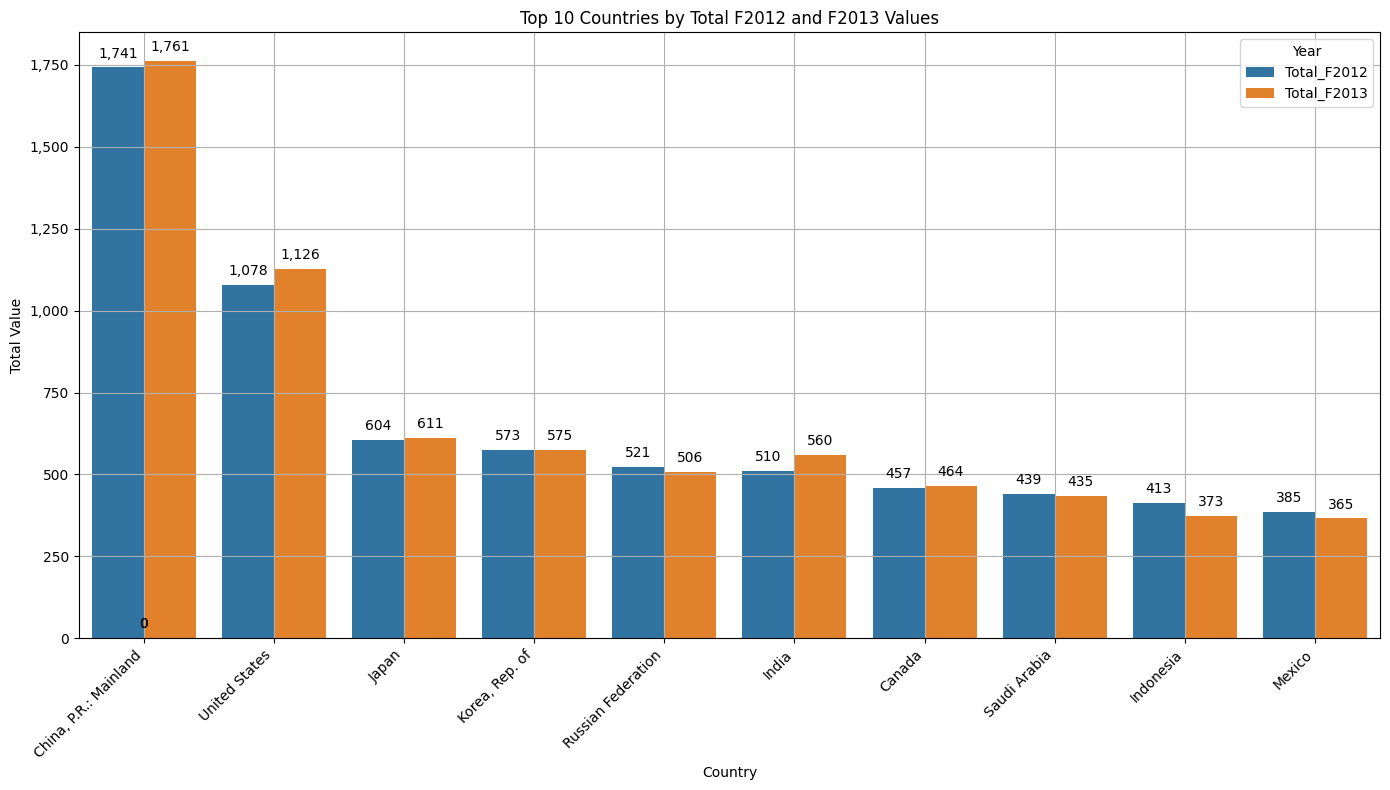

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter


unique_countries = df_cleaned['Country'].unique()
summed_values = []


for country in unique_countries:
    filtered_df = df_cleaned[df_cleaned['Country'] == country]
    
    year2012 = filtered_df['F2012'].sum()
    year2013 = filtered_df['F2013'].sum()
    
    summed_values.append({'Country': country, 'Total_F2012': year2012, 'Total_F2013': year2013})

summed_values_df = pd.DataFrame(summed_values)
summed_values_df = summed_values_df.sort_values(by='Total_F2012', ascending=False)

top_10_countries_df = summed_values_df.head(10)

print(top_10_countries_df)

melted_df = top_10_countries_df.melt(id_vars='Country', value_vars=['Total_F2012', 'Total_F2013'],
                                       var_name='Year', value_name='Total_Value')

plt.figure(figsize=(14, 8)) 
bar_plot = sns.barplot(x='Country', y='Total_Value', hue='Year', data=melted_df)

plt.title('Top 10 Countries by Total F2012 and F2013 Values')
plt.xlabel('Country')
plt.ylabel('Total Value')

plt.xticks(rotation=45, ha='right')
plt.grid()

def format_y_values(value, tick_number):
    return f'{int(value):,}' 

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout() 
plt.show()


Top 10 Countries in CO2 emission from 1995 to 2018

                  Country  Total_Sum
30  China, P.R.: Mainland  28640.554
61          United States  26863.359
52                  Japan  14037.700
50     Russian Federation  11520.773
7          Korea, Rep. of  11363.451
64                 Canada  10089.952
27                  India   9372.475
33                 Mexico   7358.454
62              Indonesia   7320.983
51           Saudi Arabia   7292.776


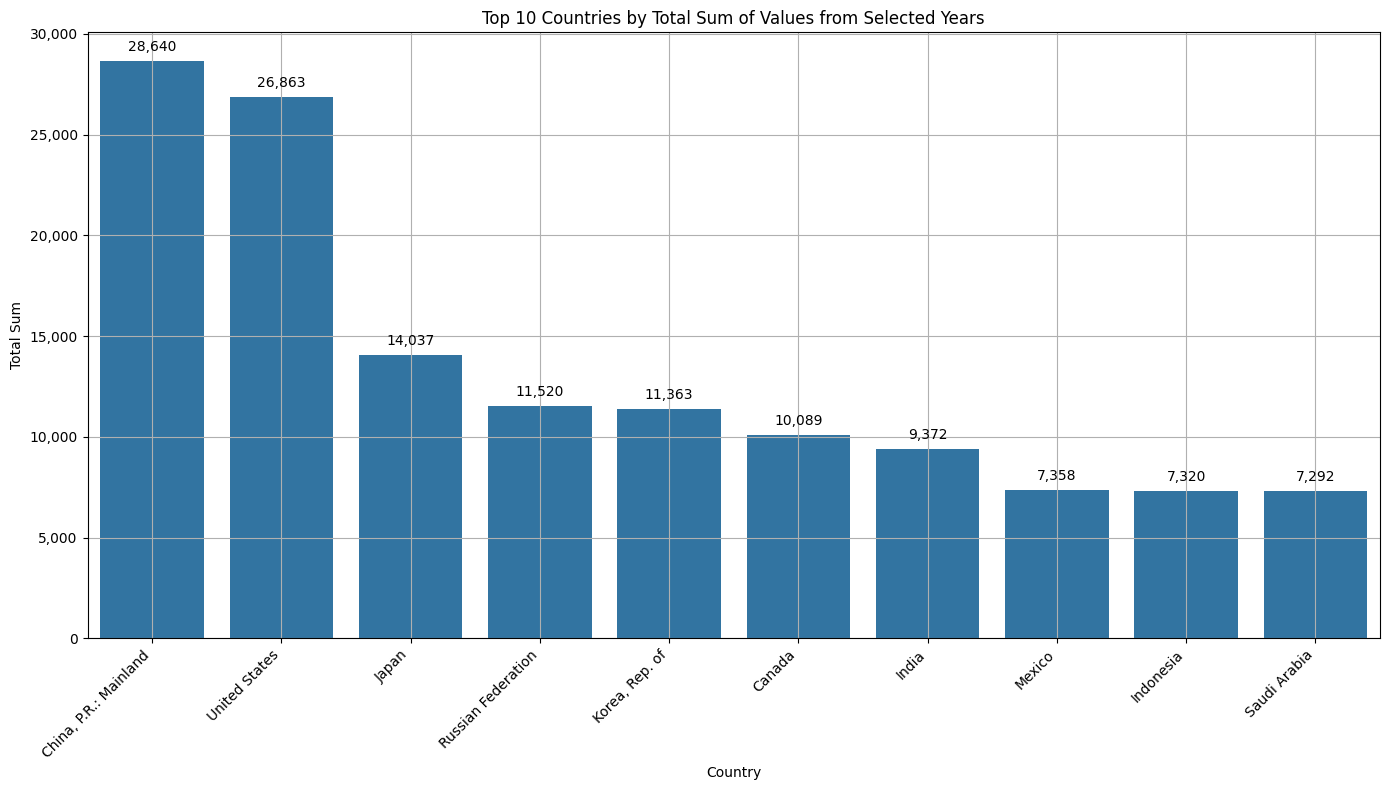

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter


columns_to_sum = ['F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 
                  'F2001', 'F2002', 'F2004', 'F2005', 'F2006', 'F2007', 
                  'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 
                  'F2014', 'F2015', 'F2016', 'F2017', 'F2018']

unique_countries = df_cleaned['Country'].unique()

summed_values = []


for country in unique_countries:
    
    filtered_df = df_cleaned[df_cleaned['Country'] == country]
    
    total_sum = filtered_df[columns_to_sum].sum().sum()  
    summed_values.append({'Country': country, 'Total_Sum': total_sum})

summed_values_df = pd.DataFrame(summed_values)
summed_values_df = summed_values_df.sort_values(by='Total_Sum', ascending=False)

top_10_countries_df = summed_values_df.head(10)


print(top_10_countries_df)

plt.figure(figsize=(14, 8))  
bar_plot = sns.barplot(x='Country', y='Total_Sum', data=top_10_countries_df)

plt.title('Top 10 Countries by Total Sum of Values from Selected Years')
plt.xlabel('Country')
plt.ylabel('Total Sum')

plt.xticks(rotation=45, ha='right')
plt.grid()

def format_y_values(value, tick_number):
    return f'{int(value):,}'  


plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout()  
plt.show()


                  Country  Total_Sum
61          United States   7941.903
30  China, P.R.: Mainland   4600.620
52                  Japan   4521.636
50     Russian Federation   3270.119
7          Korea, Rep. of   2935.384
64                 Canada   2788.531
4                 Germany   2314.481
16                  Italy   1985.005
54                 France   1869.488
33                 Mexico   1811.495


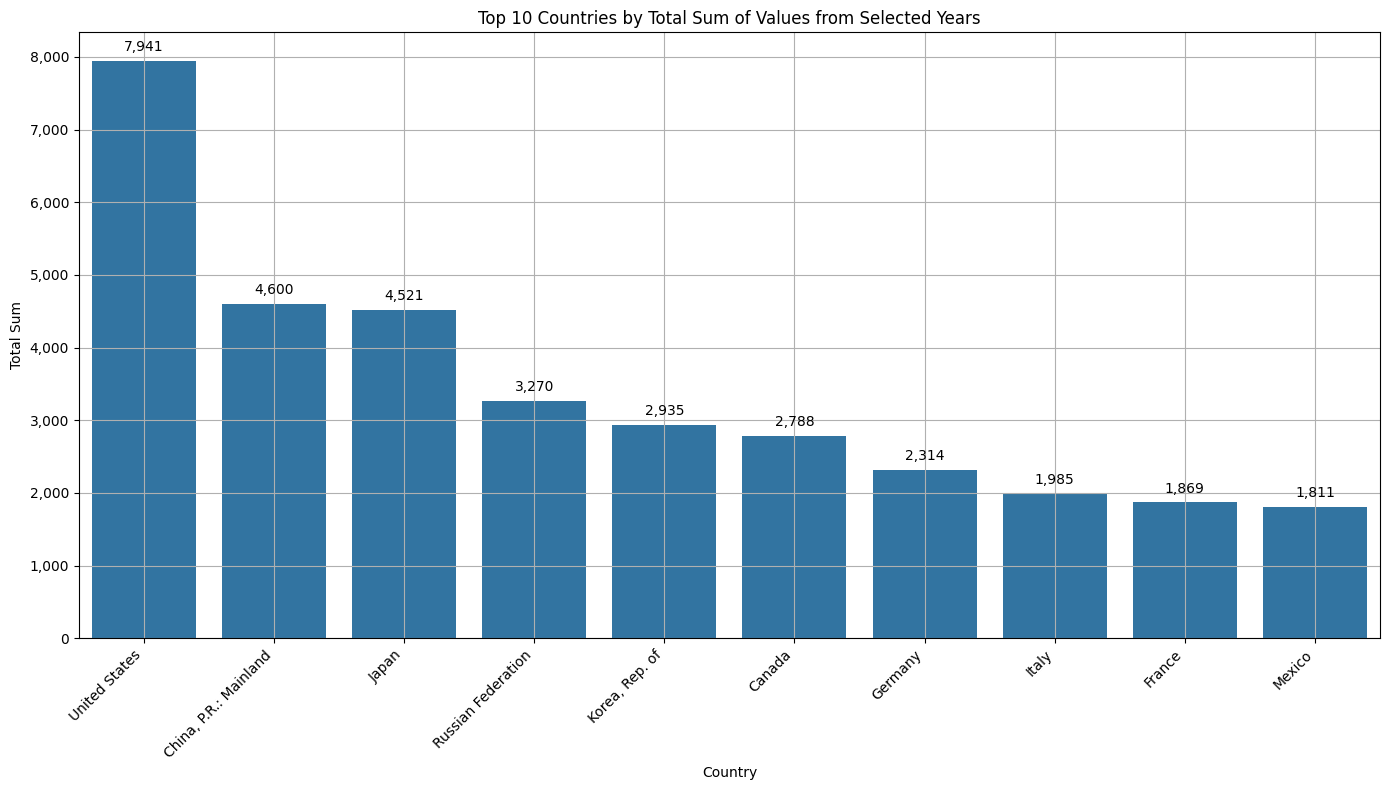

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

columns_to_sum = ['F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 
                  'F2001']

unique_countries = df_cleaned['Country'].unique()

summed_values = []

for country in unique_countries:

    filtered_df = df_cleaned[df_cleaned['Country'] == country]
    
    total_sum = filtered_df[columns_to_sum].sum().sum()  
    summed_values.append({'Country': country, 'Total_Sum': total_sum})


summed_values_df = pd.DataFrame(summed_values)
summed_values_df = summed_values_df.sort_values(by='Total_Sum', ascending=False)

top_10_countries_df = summed_values_df.head(10)

print(top_10_countries_df)

plt.figure(figsize=(14, 8)) 
bar_plot = sns.barplot(x='Country', y='Total_Sum', data=top_10_countries_df)

plt.title('Top 10 Countries by Total Sum of Values from Selected Years')
plt.xlabel('Country')
plt.ylabel('Total Sum')

plt.xticks(rotation=45, ha='right')
plt.grid()

def format_y_values(value, tick_number):
    return f'{int(value):,}' 


plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout()  
plt.show()


Industries producing CO2 in year 2012 in decreasing order

                                             Industry  Total_F2012
40  Electricity, gas, steam and air conditioning s...     2284.724
11         Land transport and transport via pipelines      793.878
14                                       Basic metals      751.351
15                                    Water transport      747.607
44                Coke and refined petroleum products      645.493
34    Mining and quarrying, energy producing products      559.733
5                                       Air transport      537.025
3                        Rubber and plastics products      518.018
4                 Other non-metallic mineral products      508.493
9               Chemicals and pharmaceutical products      398.014
33  Manufacturing nec; repair and installation of ...      379.365
25                                       Construction      369.095
6                      Agriculture, hunting, forestry      340.755
16  Wholesale and retail trade; repair of motor ve...      334

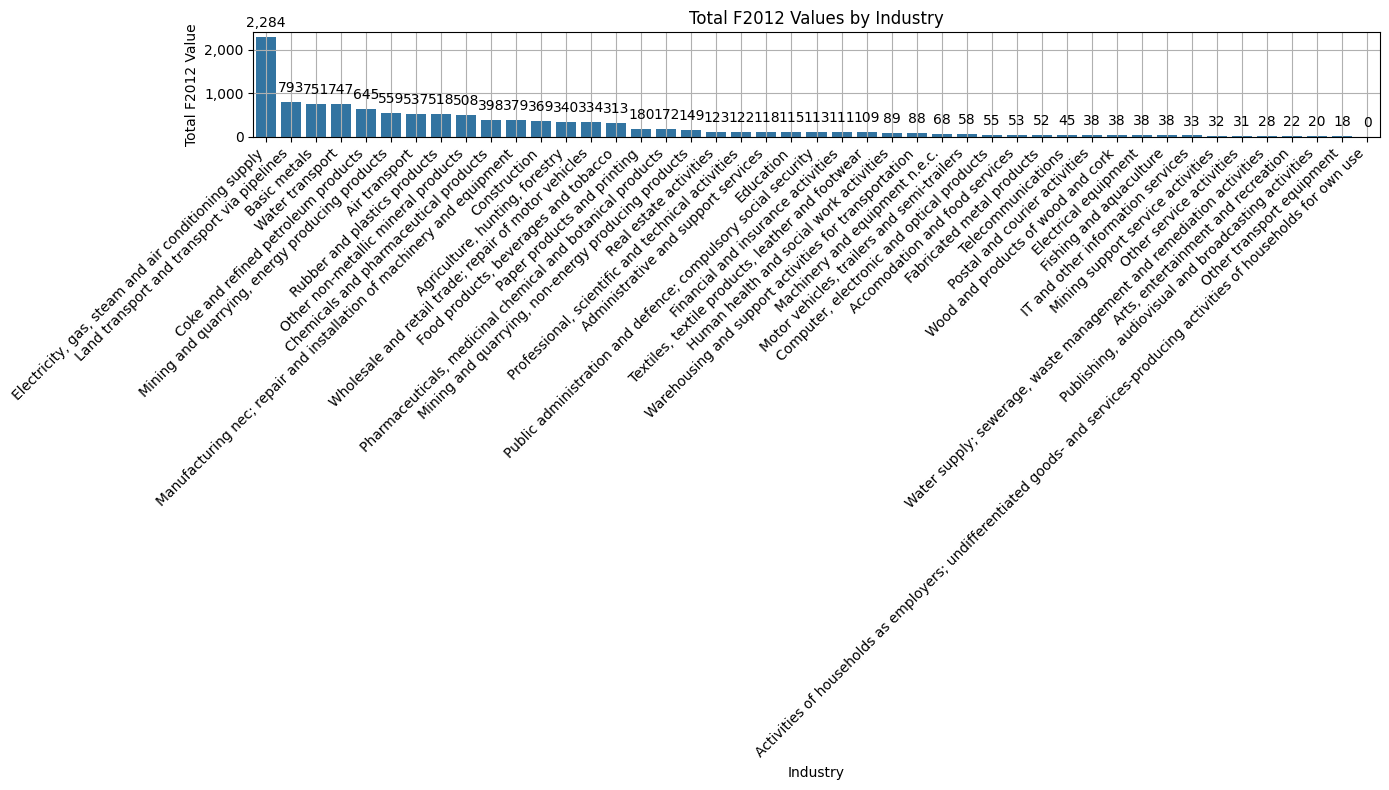

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

unique_industries = df_cleaned['Industry'].unique()
summed_values = []


for industry in unique_industries:
    
    filtered_df = df_cleaned[df_cleaned['Industry'] == industry]
    
    total_f2012 = filtered_df['F2012'].sum()
    

    summed_values.append({'Industry': industry, 'Total_F2012': total_f2012})


summed_values_df = pd.DataFrame(summed_values)
summed_values_df = summed_values_df.sort_values(by='Total_F2012', ascending=False)

print(summed_values_df)

plt.figure(figsize=(14, 8))  
bar_plot = sns.barplot(x='Industry', y='Total_F2012', data=summed_values_df)
plt.title('Total F2012 Values by Industry')
plt.xlabel('Industry')
plt.ylabel('Total F2012 Value')

plt.xticks(rotation=45, ha='right')
plt.grid()

def format_y_values(value, tick_number):
    return f'{int(value):,}'  

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout() 
plt.show()


Top 10 industries who are producing CO2 in 2012

                                             Industry  Total_F2012
40  Electricity, gas, steam and air conditioning s...     2284.724
11         Land transport and transport via pipelines      793.878
14                                       Basic metals      751.351
15                                    Water transport      747.607
44                Coke and refined petroleum products      645.493
34    Mining and quarrying, energy producing products      559.733
5                                       Air transport      537.025
3                        Rubber and plastics products      518.018
4                 Other non-metallic mineral products      508.493
9               Chemicals and pharmaceutical products      398.014


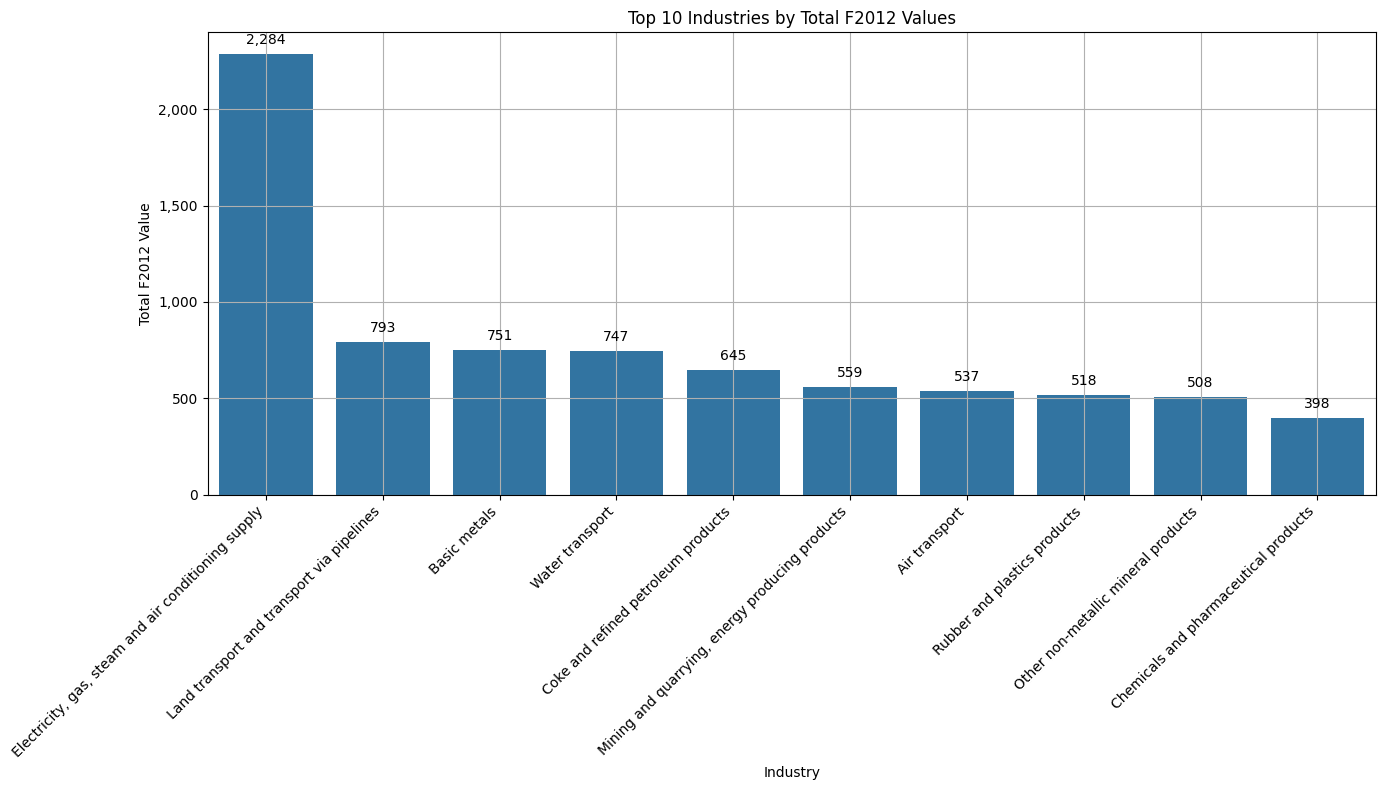

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

unique_industries = df_cleaned['Industry'].unique()

summed_values = []

for industry in unique_industries:

    filtered_df = df_cleaned[df_cleaned['Industry'] == industry]
    
    total_f2012 = filtered_df['F2012'].sum()
    
   
    summed_values.append({'Industry': industry, 'Total_F2012': total_f2012})


summed_values_df = pd.DataFrame(summed_values)
summed_values_df = summed_values_df.sort_values(by='Total_F2012', ascending=False)

top_10_industries_df = summed_values_df.head(10)


print(top_10_industries_df)

plt.figure(figsize=(14, 8)) 
bar_plot = sns.barplot(x='Industry', y='Total_F2012', data=top_10_industries_df)
plt.title('Top 10 Industries by Total F2012 Values')
plt.xlabel('Industry')
plt.ylabel('Total F2012 Value')

plt.xticks(rotation=45, ha='right')
plt.grid()

def format_y_values(value, tick_number):
    return f'{int(value):,}'  

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout()  
plt.show()


                                             Industry     F1995     F1996  \
40  Electricity, gas, steam and air conditioning s...  1436.032  1490.944   
14                                       Basic metals   682.636   673.272   
44                Coke and refined petroleum products   566.105   547.129   
15                                    Water transport   497.540   536.605   
11         Land transport and transport via pipelines   426.835   448.360   
4                 Other non-metallic mineral products   382.848   391.785   
34    Mining and quarrying, energy producing products   360.873   372.148   
9               Chemicals and pharmaceutical products   367.645   375.738   
5                                       Air transport   314.288   330.245   
6                      Agriculture, hunting, forestry   335.826   328.766   

       F1997     F1998     F1999     F2000     F2001  Total_Sum  
40  1538.179  1573.671  1595.823  1731.559  1773.063  11139.271  
14   679.836   664.6

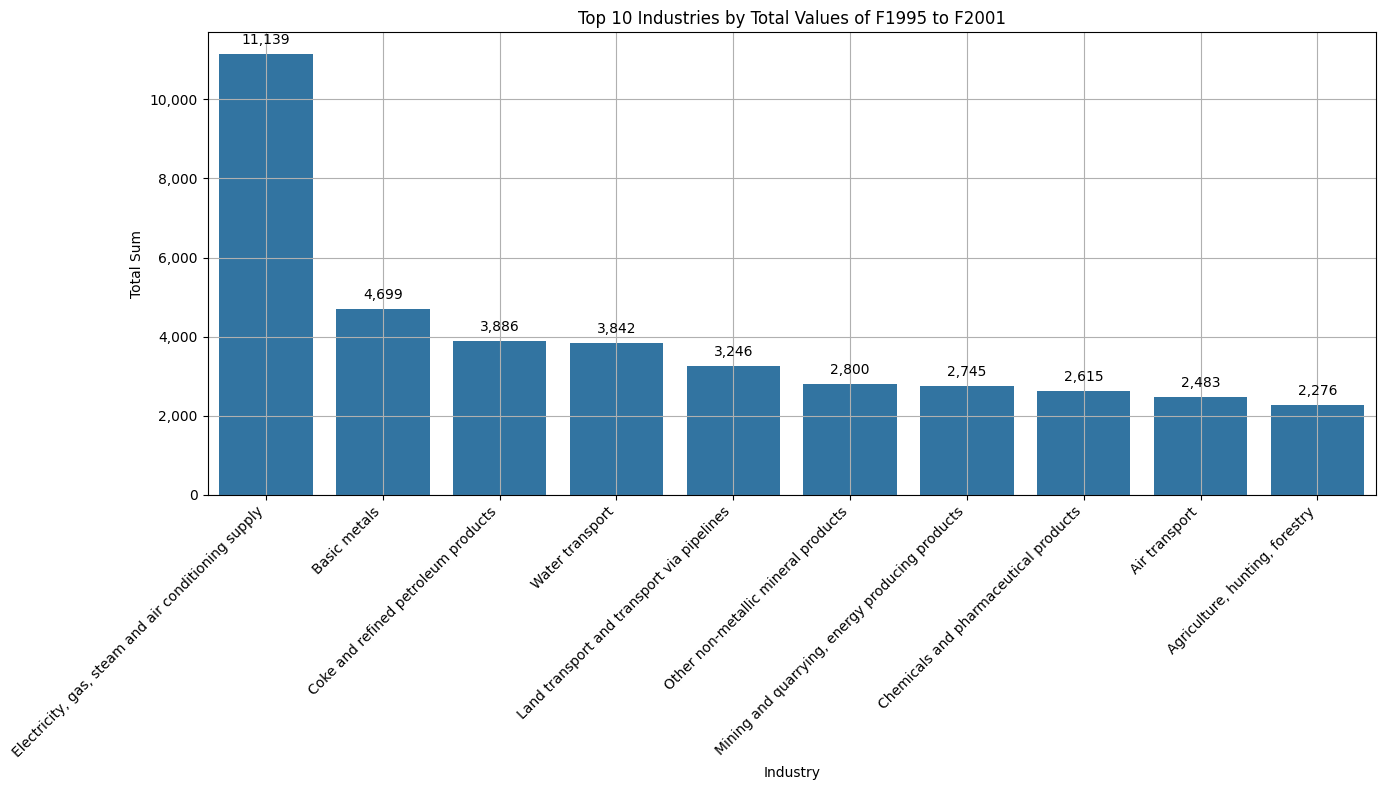

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

columns_to_sum = ['F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001']

unique_industries = df_cleaned['Industry'].unique()

summed_values = []

for industry in unique_industries:
    
    filtered_df = df_cleaned[df_cleaned['Industry'] == industry]
    
    total_values = filtered_df[columns_to_sum].sum()
    
    summed_values.append({'Industry': industry, **total_values})


summed_values_df = pd.DataFrame(summed_values)
summed_values_df['Total_Sum'] = summed_values_df[columns_to_sum].sum(axis=1)


summed_values_df = summed_values_df.sort_values(by='Total_Sum', ascending=False)

top_10_industries_df = summed_values_df.head(10)

print(top_10_industries_df)

plt.figure(figsize=(14, 8)) 
bar_plot = sns.barplot(x='Industry', y='Total_Sum', data=top_10_industries_df)
plt.title('Top 10 Industries by Total Values of F1995 to F2001')
plt.xlabel('Industry')
plt.ylabel('Total Sum')

plt.xticks(rotation=45, ha='right')
plt.grid()

def format_y_values(value, tick_number):
    return f'{int(value):,}'  

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout()  
plt.show()


Top 10 CO2 emitting Industries from 1995 to 2018

                                             Industry     F1995     F1996  \
40  Electricity, gas, steam and air conditioning s...  1436.032  1490.944   
14                                       Basic metals   682.636   673.272   
15                                    Water transport   497.540   536.605   
11         Land transport and transport via pipelines   426.835   448.360   
44                Coke and refined petroleum products   566.105   547.129   
34    Mining and quarrying, energy producing products   360.873   372.148   
5                                       Air transport   314.288   330.245   
4                 Other non-metallic mineral products   382.848   391.785   
3                        Rubber and plastics products   229.886   233.009   
9               Chemicals and pharmaceutical products   367.645   375.738   

       F1997     F1998     F1999     F2000     F2001     F2002     F2004  ...  \
40  1538.179  1573.671  1595.823  1731.559  1773.063  1816.239  1942.75

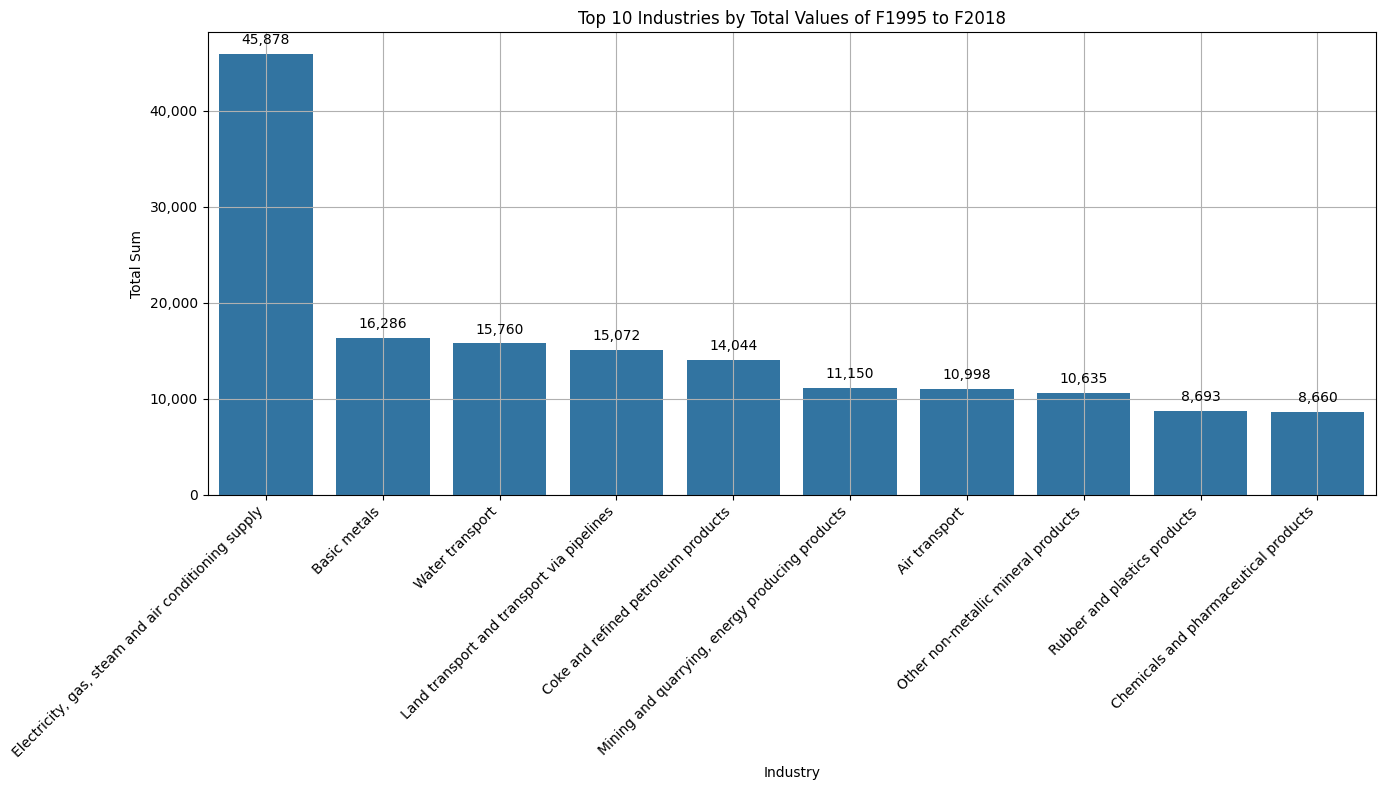

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

columns_to_sum = ['F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 
                  'F2001', 'F2002', 'F2004', 'F2005', 'F2006', 'F2007', 
                  'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 
                  'F2014', 'F2015', 'F2016', 'F2017', 'F2018']


unique_industries = df_cleaned['Industry'].unique()
summed_values = []


for industry in unique_industries:
    
    filtered_df = df_cleaned[df_cleaned['Industry'] == industry]
    total_values = filtered_df[columns_to_sum].sum()
    summed_values.append({'Industry': industry, **total_values})
summed_values_df = pd.DataFrame(summed_values)
summed_values_df['Total_Sum'] = summed_values_df[columns_to_sum].sum(axis=1)
summed_values_df = summed_values_df.sort_values(by='Total_Sum', ascending=False)
top_10_industries_df = summed_values_df.head(10)
print(top_10_industries_df)
plt.figure(figsize=(14, 8))  # Increase figure size for better spacing
bar_plot = sns.barplot(x='Industry', y='Total_Sum', data=top_10_industries_df)
plt.title('Top 10 Industries by Total Values of F1995 to F2018')
plt.xlabel('Industry')
plt.ylabel('Total Sum')


plt.xticks(rotation=45, ha='right')
plt.grid()


def format_y_values(value, tick_number):
    return f'{int(value):,}'  # Format as integers with commas


plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))


for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout() 
plt.show()


Now we are exporting our cleaned file in csv format

In [65]:
df_cleaned.to_csv('Cleaned_data.csv', index=False)